In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
# base libraries
import warnings; warnings.simplefilter('ignore')
import os
import sys

# external libraries
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display_javascript, display_html, display

# local libraries
sys.path.append(os.path.abspath("../"))
import readme_utils


sns.set(font_scale=3)
matplotlib.rcParams['svg.fonttype'] = 'none'
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

# Load baseline data for the Benchmark

In [3]:
info = readme_utils.io.load_benchmark_info("_info.yaml")
readme_utils.plot.show_info(info)

Benchmark 
 
 
 ID 
 CATH 
 # motifs 
 
 
 T14 
 CATH.3.30.110.40 
 1 
 
 
 Structures 
 
 
 Query 
 Reference 
 
 
 3lvjC.pdb 
 1jdqA.pdb 
 
 
 Design 
 
 
 motif 
 chain 
 sequence shift 
 
 
 14-37 
 C 
 10 
 
 
 Experiments 
 abinitio 
 nubinitio 
 
 
 Fragment types 
 
 
 auto 
 Automatic fragment generation (sequence + secondary structure) 
 
 
 picker 
 Standard Rosetta fragment generation (sequence-based data) 
 
 
 wauto 
 Automatic fragment generation (secondary structure + angles + sasa)

In [4]:
base = readme_utils.io.load_baseline(info)
base

,score,lbl_CORE,lbl_PICKED,lbl_MOTIF,lbl_QUERY,sequence_C,structure_C,lbl_CONTACTS
0,35.082,"3,5,13,24,30,32,34,36,39,43,47,64,66,70","3,30,32,43,46,66,68",5-28,38-50,HTLDALGLRCPEPVMMVRKTVRNMQPGETLLIIADDPATTRDIPGFCTFMEHELVAKETDGLPYRYLIRKG,LEEELLLLLLLHHHHHHHHHHHLLLLLLEEEEEELLHHHHHHHHHHHHHLLLEEEEEELLLLLEEEEEELL,"1-4,29-30,32-39,41-43,45-47,50,52-53,62-64,66,68-71"


# Fragment analysis

In [5]:
fragments = readme_utils.io.load_fragments( info )

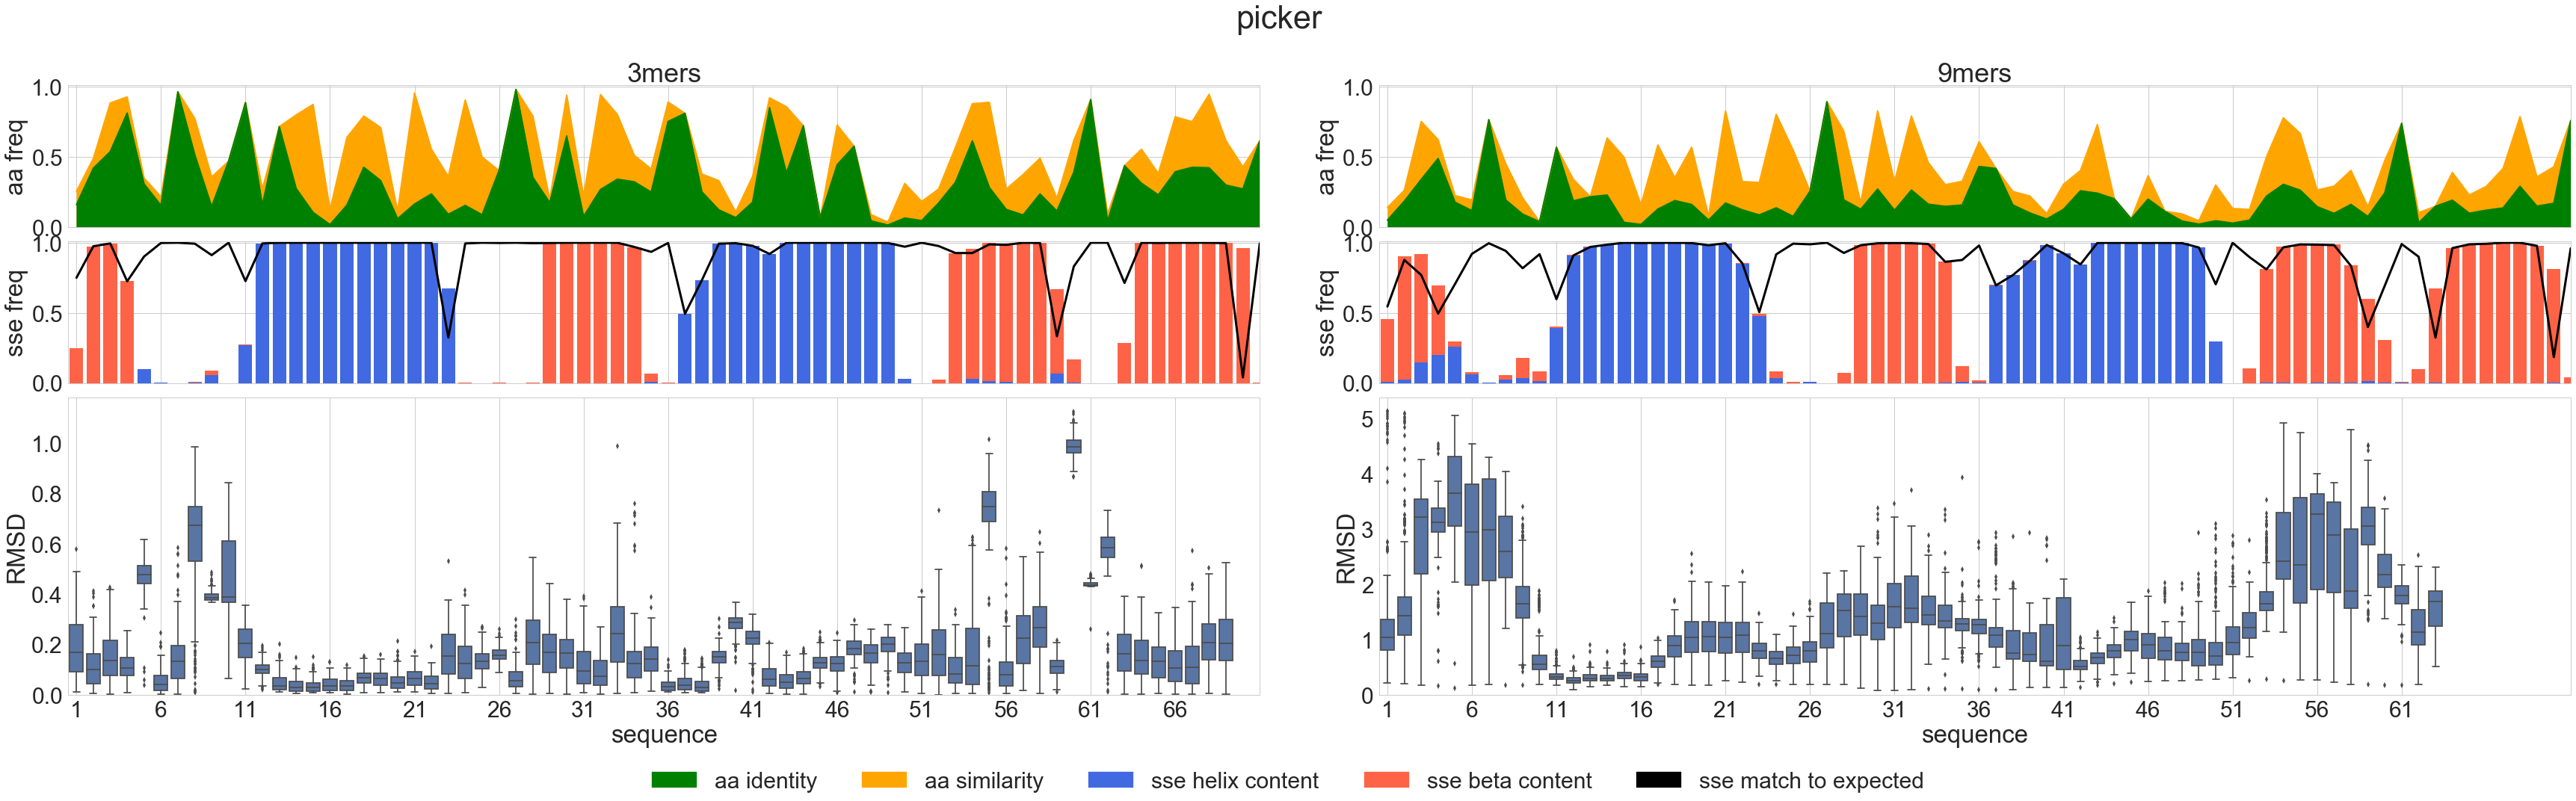

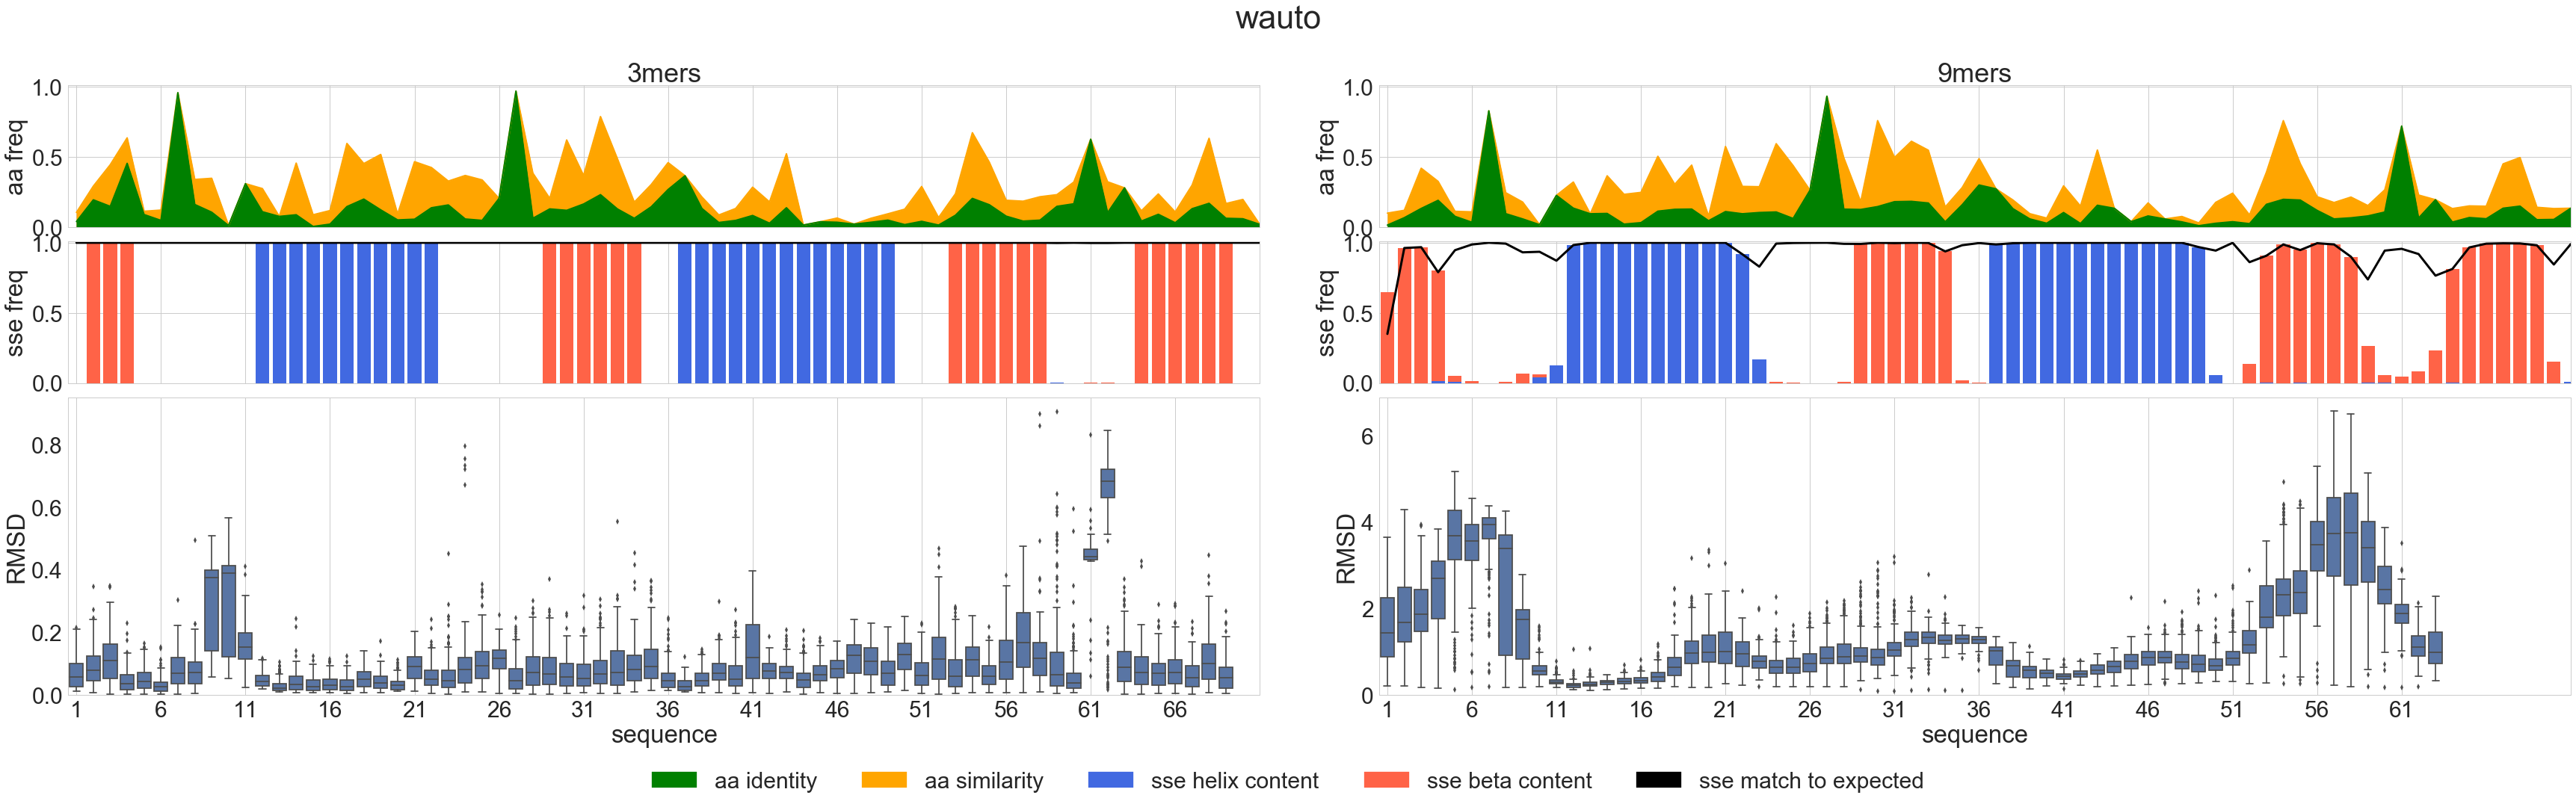

In [6]:
readme_utils.plot.plot_fragments( fragments, info, base )

# Main data analysis

In [7]:
df = readme_utils.io.load_main_data( info, base )

In [8]:
print "columns:", ", ".join([str(x) for x in df.columns.values]), "\n"
df.groupby(["experiment", "fragments"]).count()["description"]

columns: score, ALIGNRMSD, BUNS, COMPRRMSD, C_ni_mtcontacts, C_ni_rmsd, C_ni_rmsd_threshold, C_ni_trials, MOTIFRMSD, cav_vol, driftRMSD, finalRMSD, packstat, C_ni_rmsd_type, description, experiment, fragments, sequence_C, benchmark 



experiment  fragments
abinitio    auto         9932 
            picker       3130 
            wauto        4054 
nubinitio   auto         10296
            picker       10296
            wauto        10296
Name: description, dtype: int64

## Compare FFL vs. abinitio RMSD

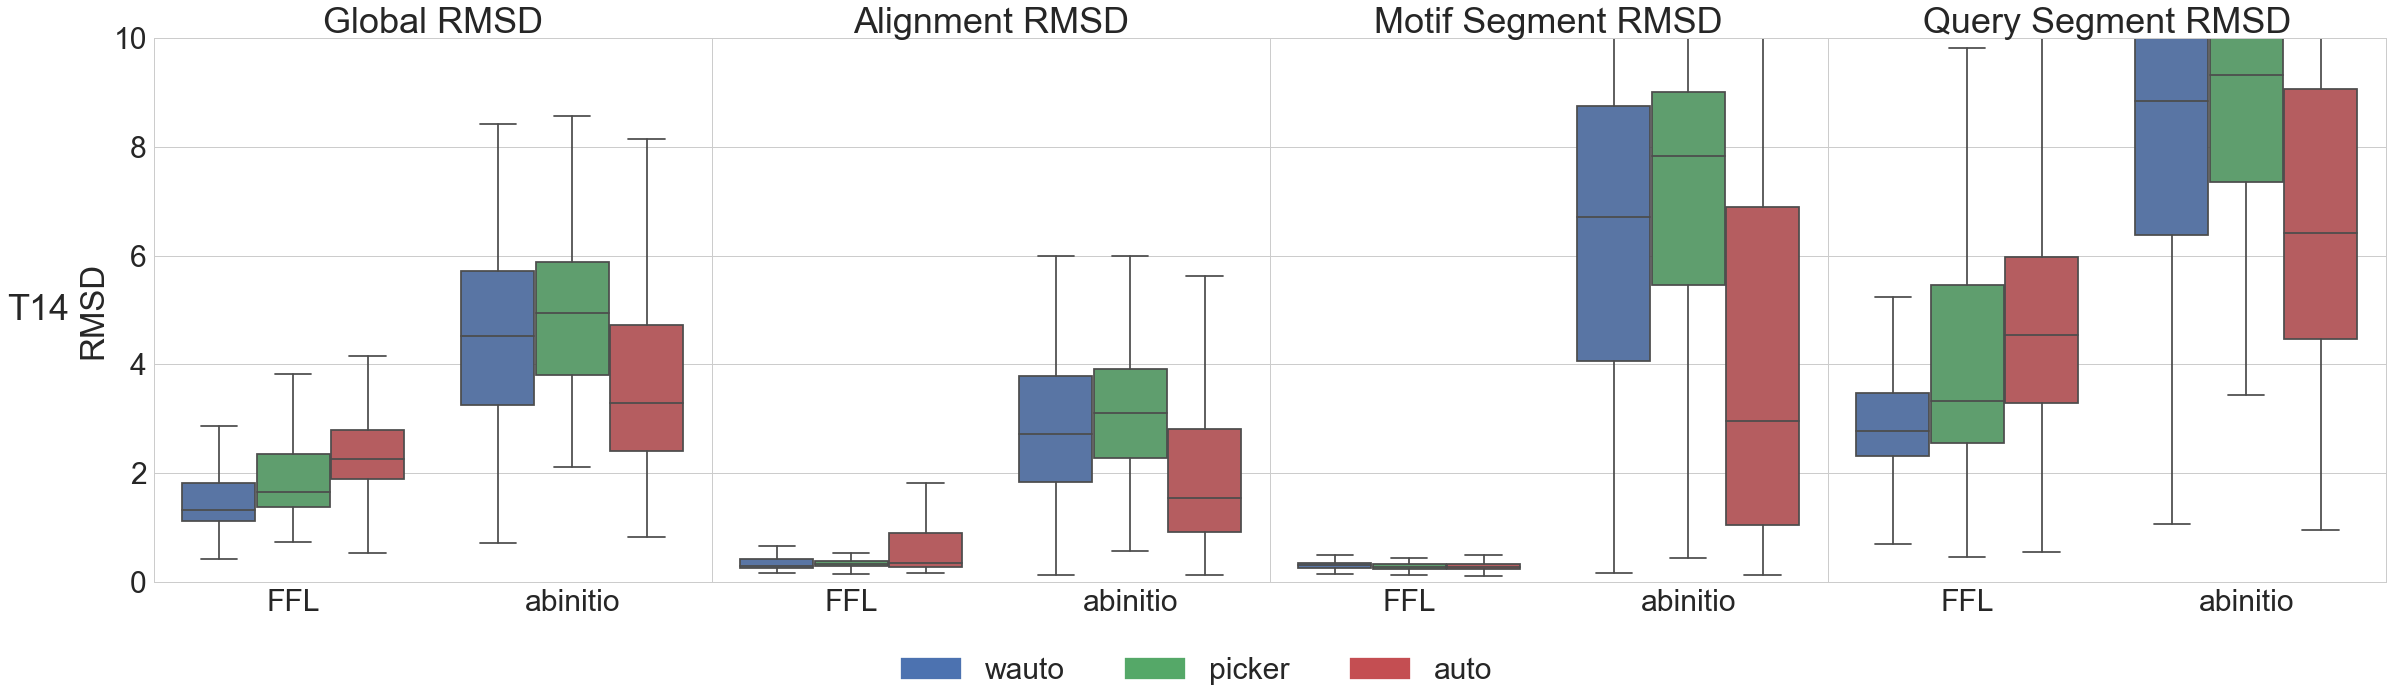

In [9]:
readme_utils.plot.plot_main_summary( df )

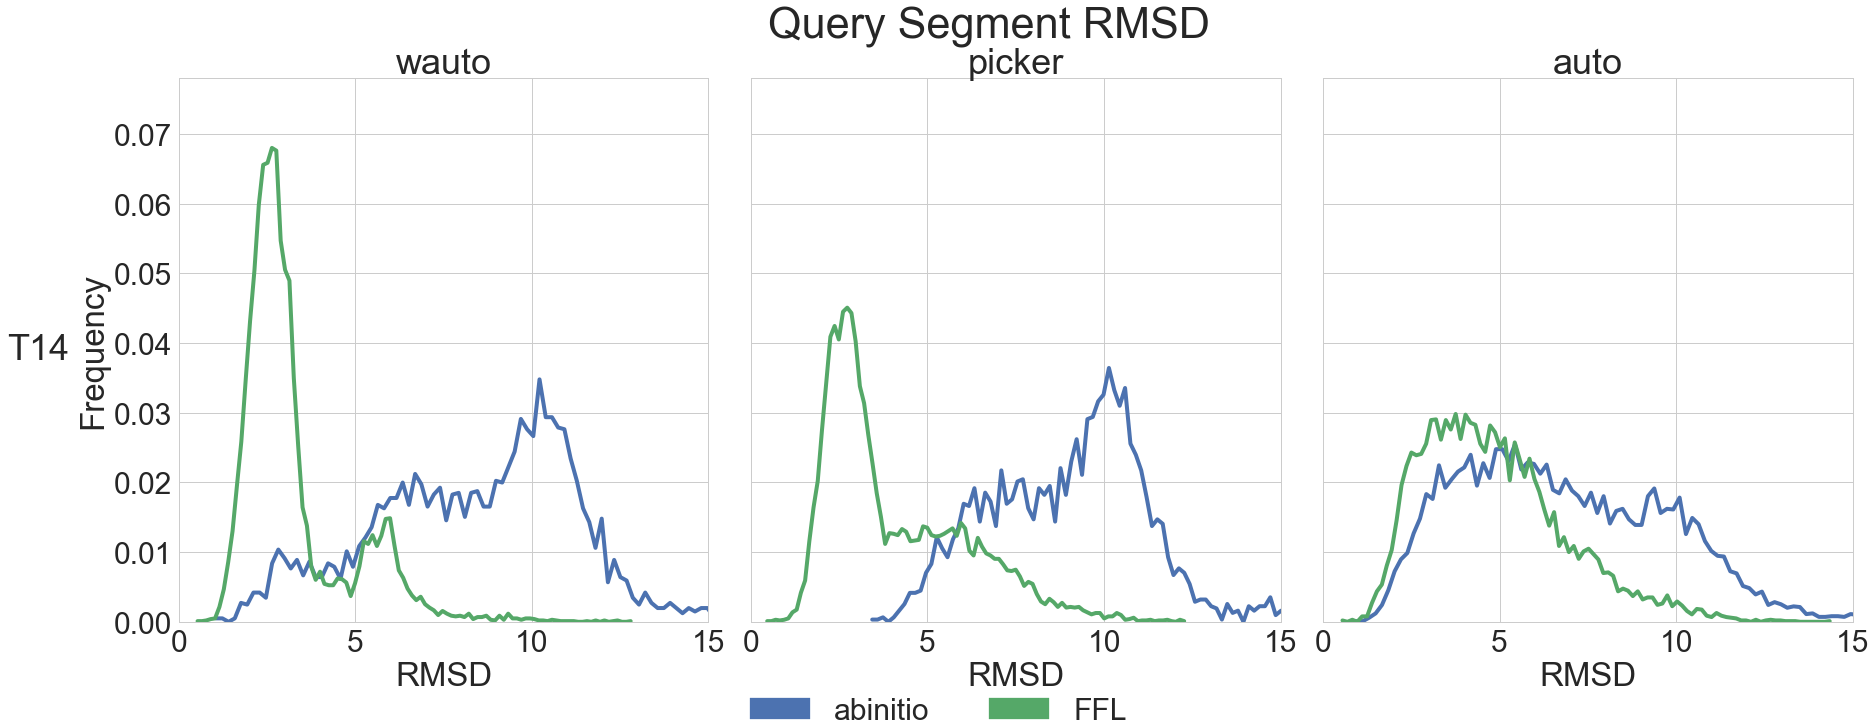

In [10]:
readme_utils.plot.plot_main_distributions( df, 15 )

## FFL sequence retrieval

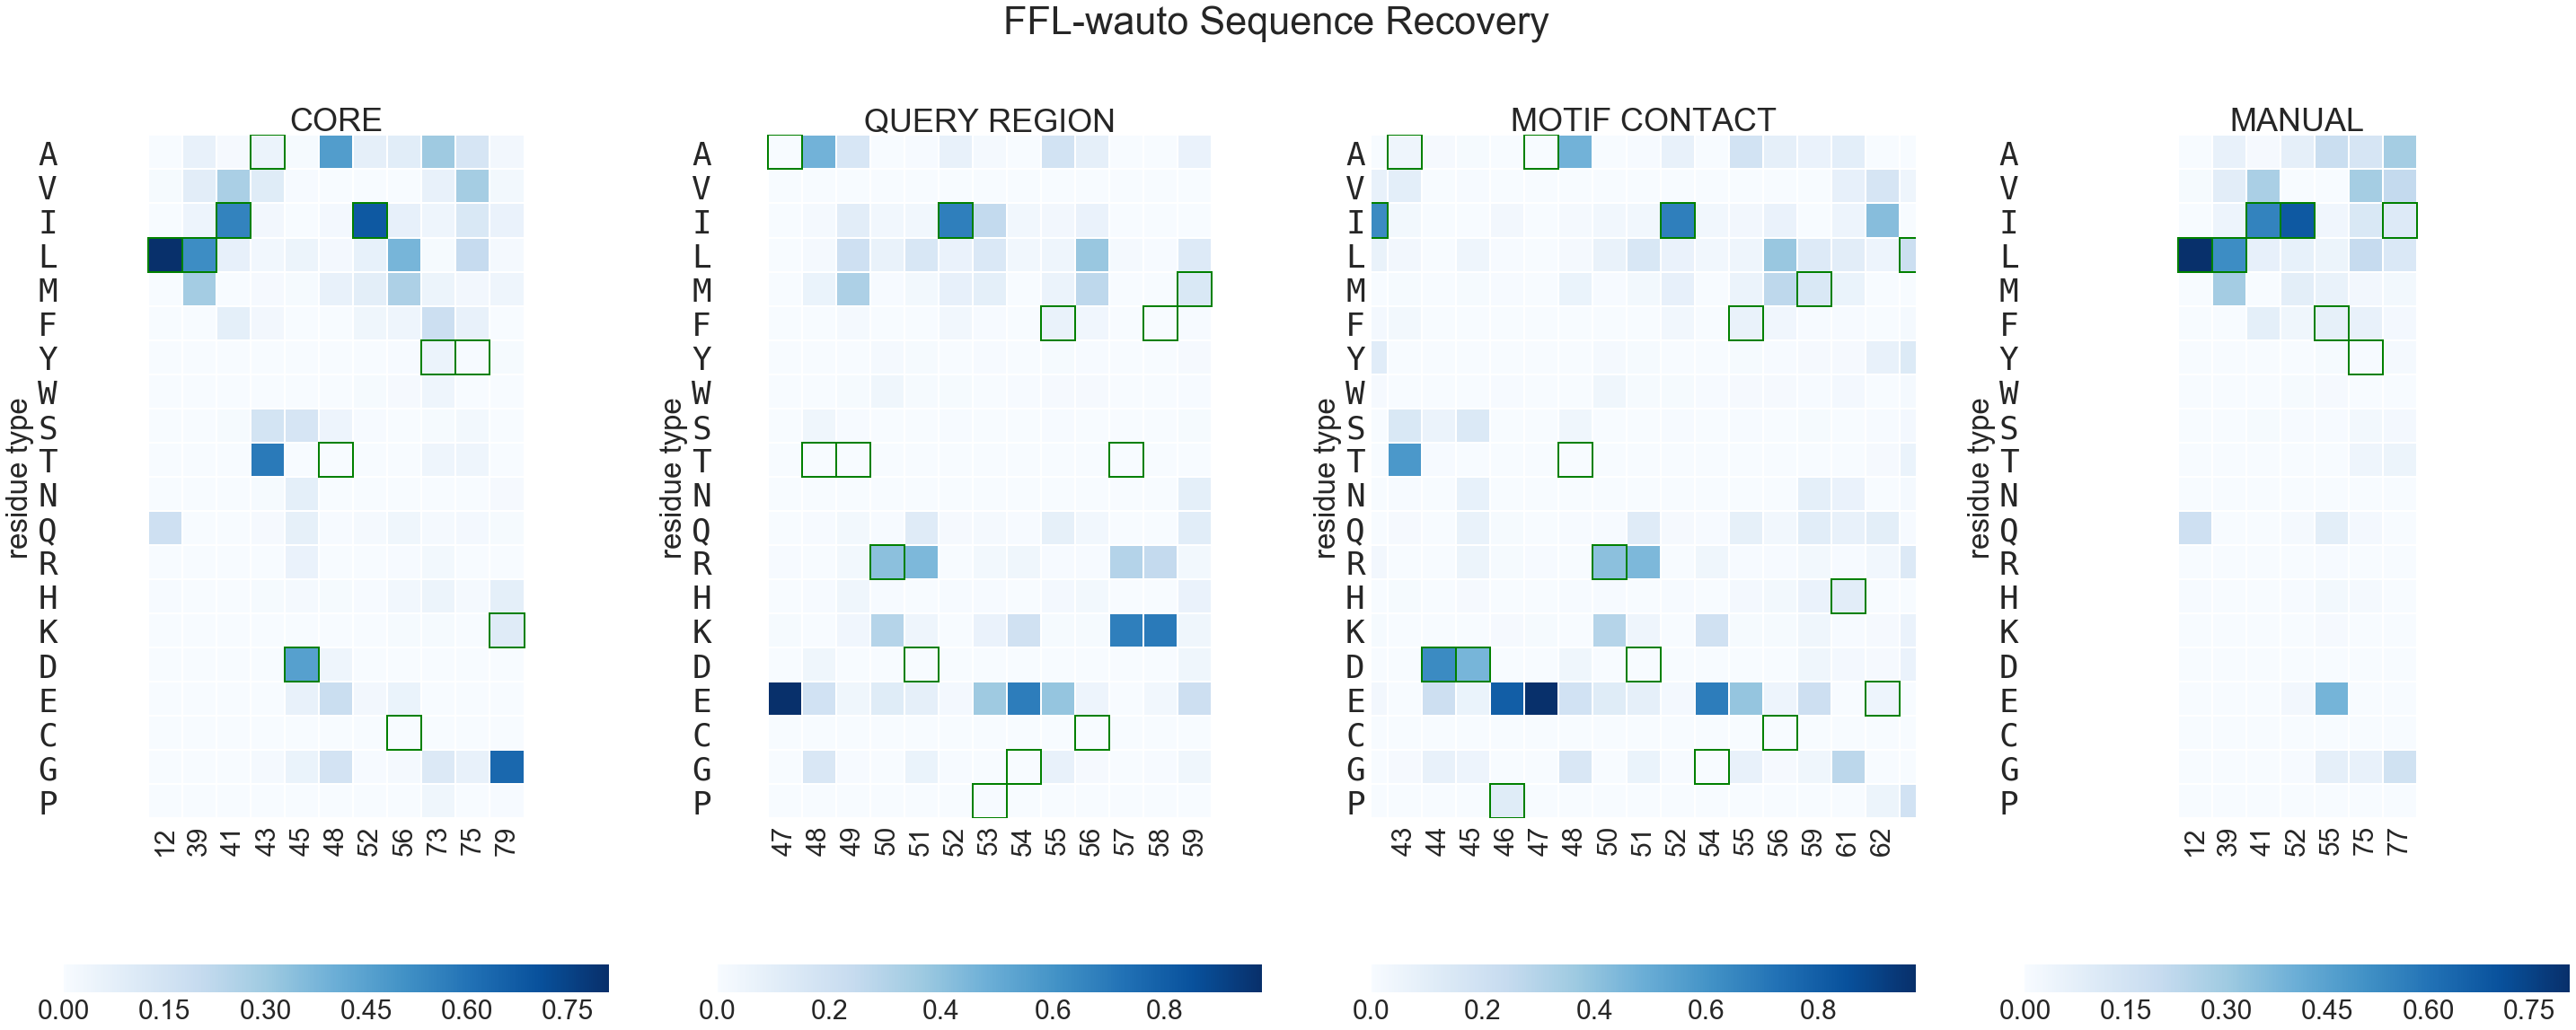

In [11]:
readme_utils.plot.plot_aa_heatmaps( df, info, base, 0.1 )

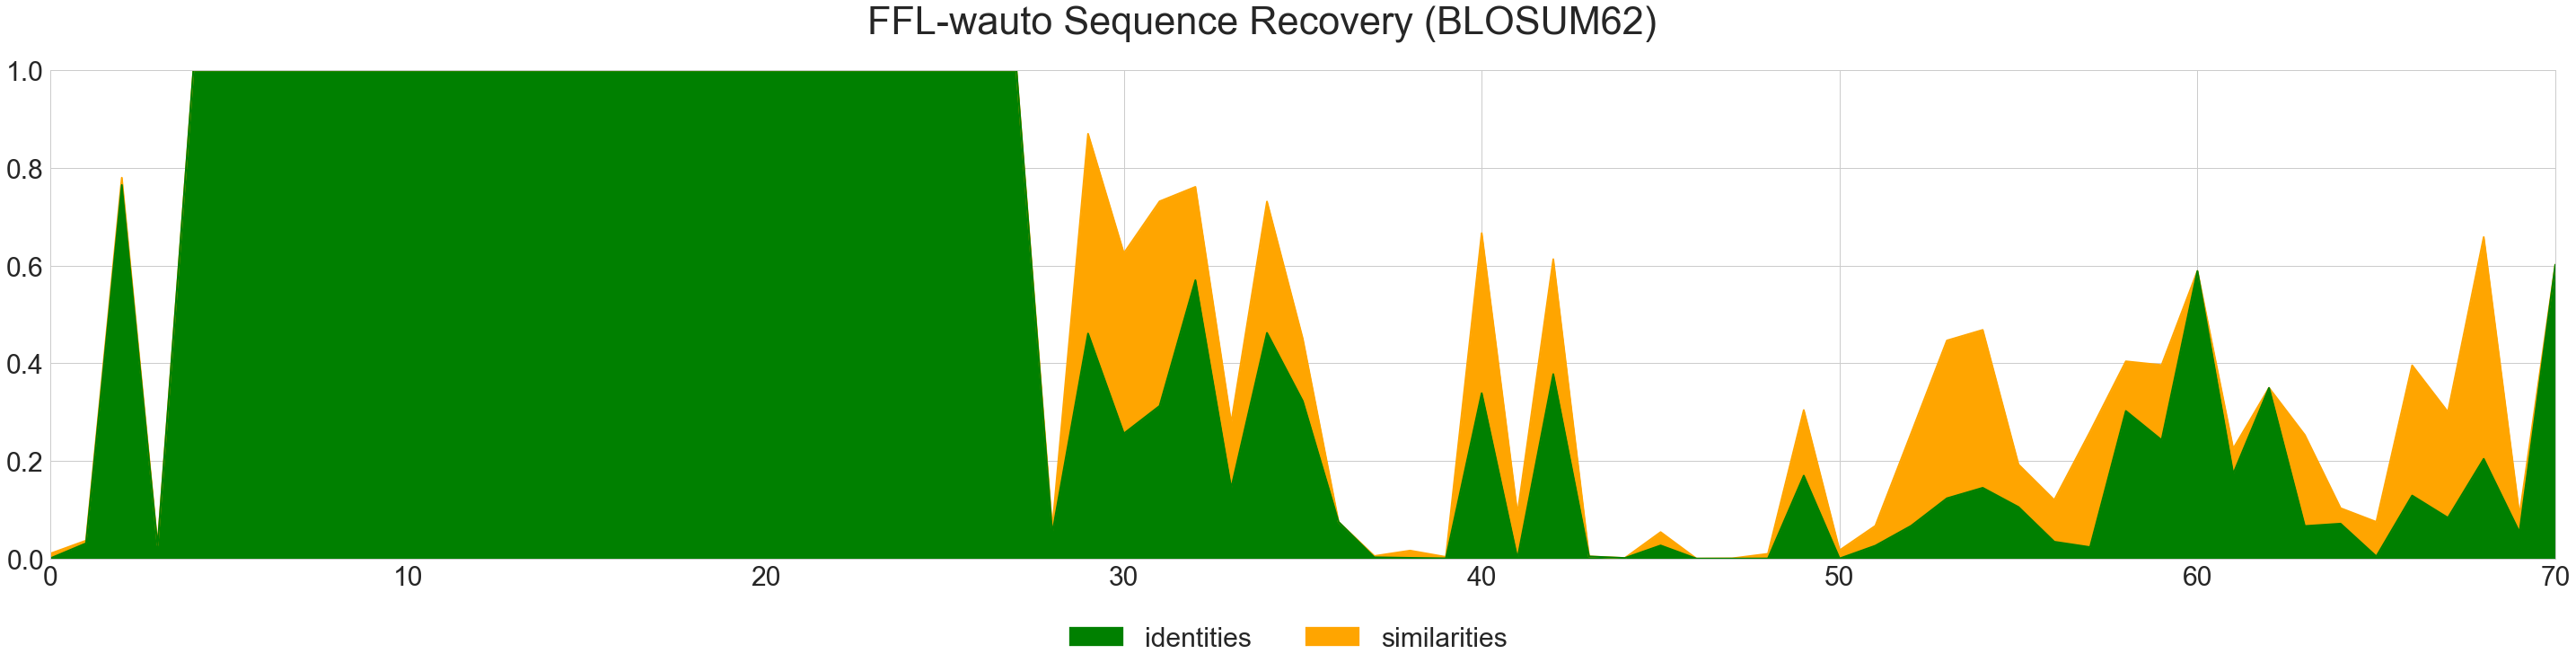

In [12]:
readme_utils.plot.plot_aa_similarities( df, info, base )

## Success?
We measure success over the top 10% scored decoys of each experiment/fragment type; comparing the performance of FFL vs. that of _abinitio_.

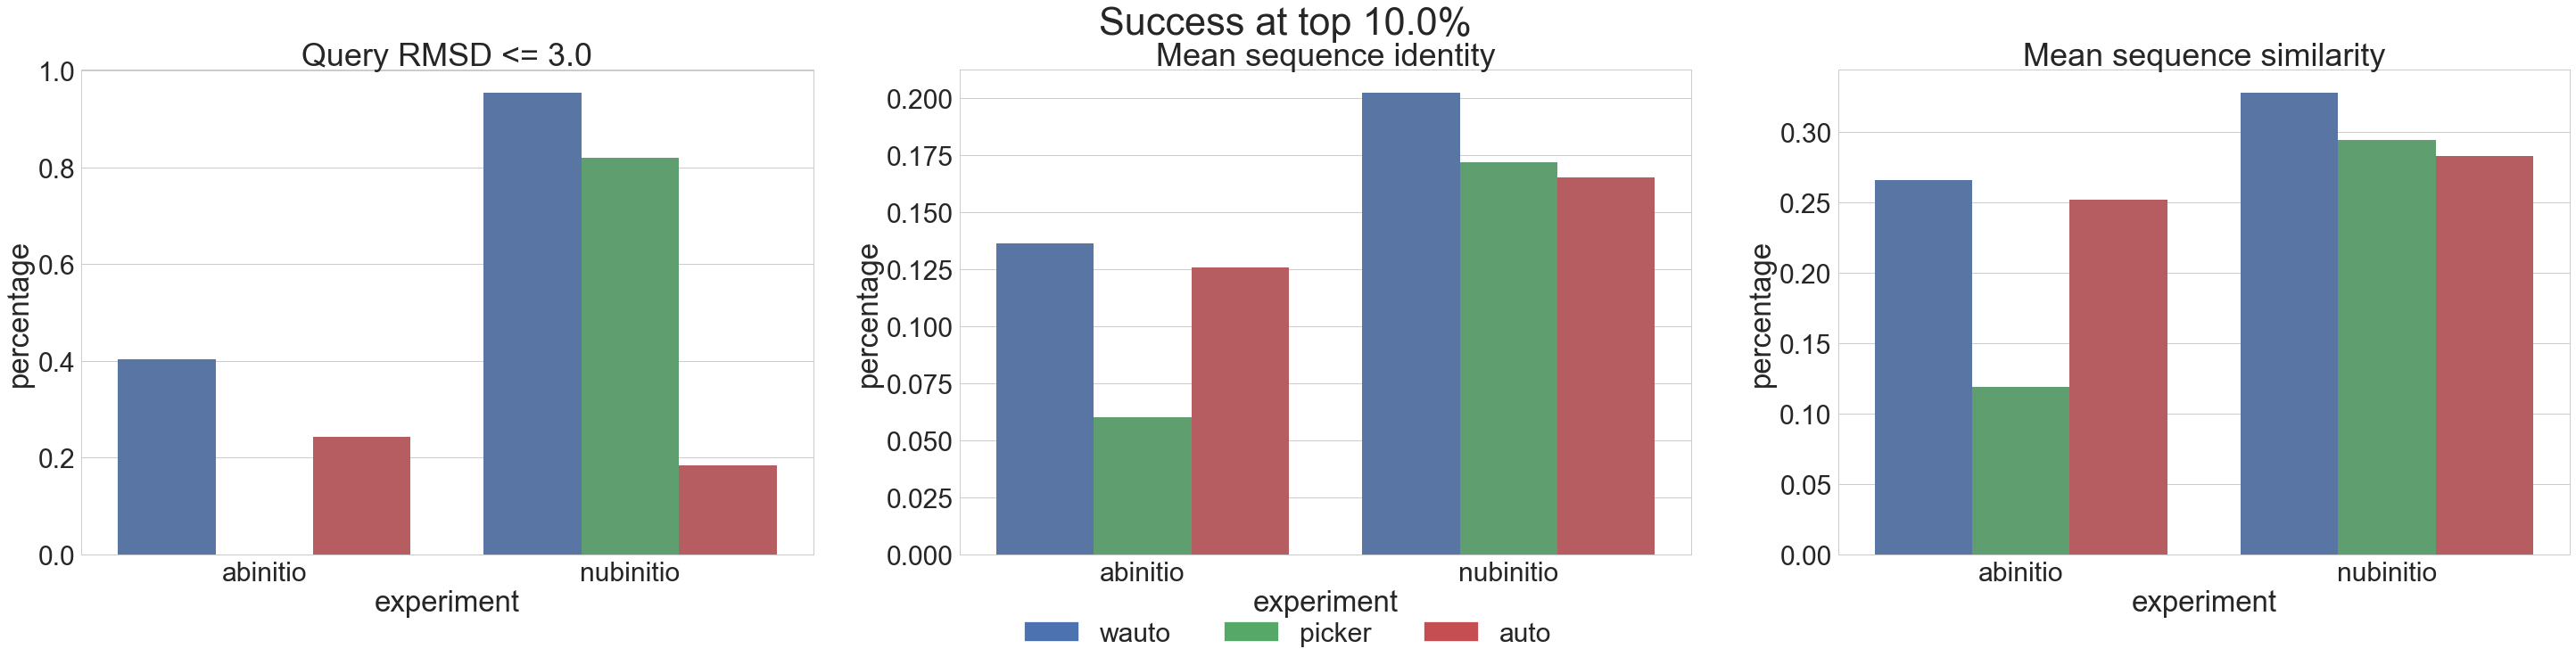

In [13]:
readme_utils.plot.check_success(df, info, base, 0.1, 3.0)